In [7]:
!pip install pandas numpy matplotlib seaborn scikit-learn

Цель понять какие характеристики автомобиля влияют на расход топлива.
Построить модель которая может предсказать расход топлива автомобиля на основе его характеристик.
Сравнить несколько моделей и выбрать оптимальную для предсказаний

АНАЛИЗ РЕГРЕССИИ - ДАТАСЕТ AUTOMPG

 Данные загружены из seaborn
 Размер датасета: (398, 9)

 Первые 5 строк:
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  

 Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  

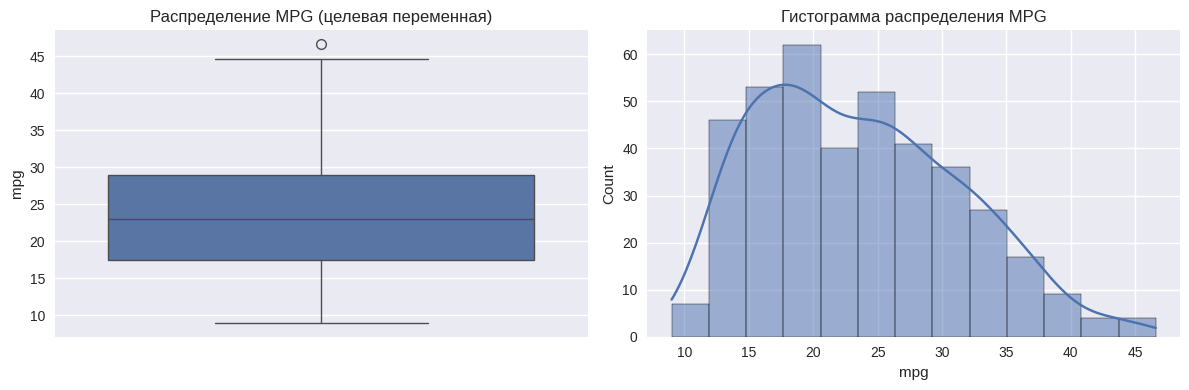

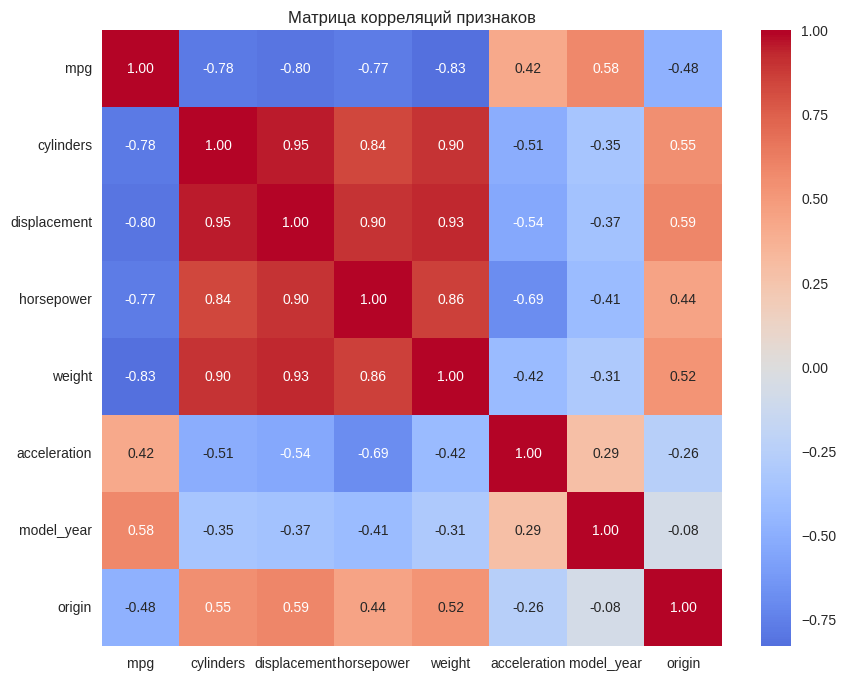

Наиболее важные признаки для предсказания mpg:
mpg             1.000000
model_year      0.579267
acceleration    0.420289
origin         -0.482619
horsepower     -0.773453
cylinders      -0.775396
displacement   -0.804203
weight         -0.831741
Name: mpg, dtype: float64

Подготавливаем данные для обучения.
Типы данных в X:
cylinders       float64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year      float64
origin            int64
dtype: object

Итоговый размер данных X: (398, 7)
Размер обучающей выборки: (318, 7)
Размер тестовой выборки: (80, 7)
Данные для обучения подготовлены.

 Обучаем модели регрессии.
 Обучение модели: Linear Regression
    Linear Regression - R²: 0.8348, RMSE: 2.9804
 Обучение модели: Random Forest
    Random Forest - R²: 0.9116, RMSE: 2.1804
 Обучение модели: Gradient Boosting
    Gradient Boosting - R²: 0.8985, RMSE: 2.3357
 Обучение модели: Support Vector Regression
    Support Vector Regression - R²

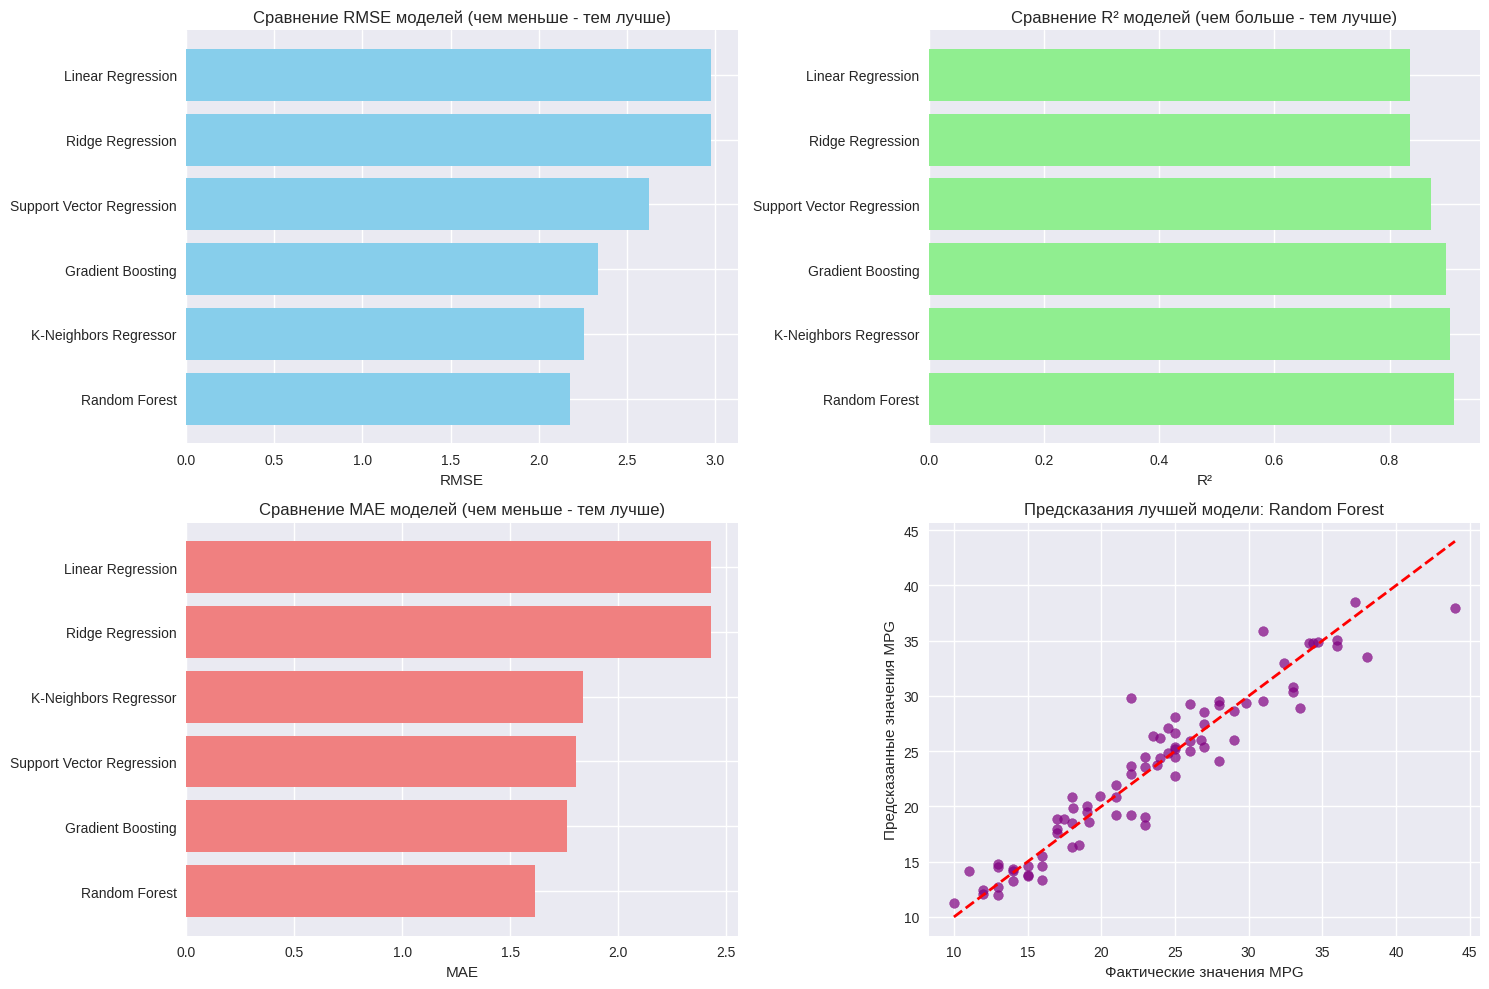


 *Лучшая модель*: Random Forest
 Метрики лучшей модели:
   MAE: 1.6140
   MSE: 4.7541
   RMSE: 2.1804
   R²: 0.9116

 Создание синтетических данных для регрессии.
 Размер синтетического датасета для регрессии: (1000, 11)
 Результаты на синтетических данных:
 RMSE: 37.4855
 R²: 0.8872

 Создание синтетических данных для классификации.
 Размер синтетического датасета для классификации: (1000, 11)
 Распределение классов:
target
0    334
2    333
1    333
Name: count, dtype: int64


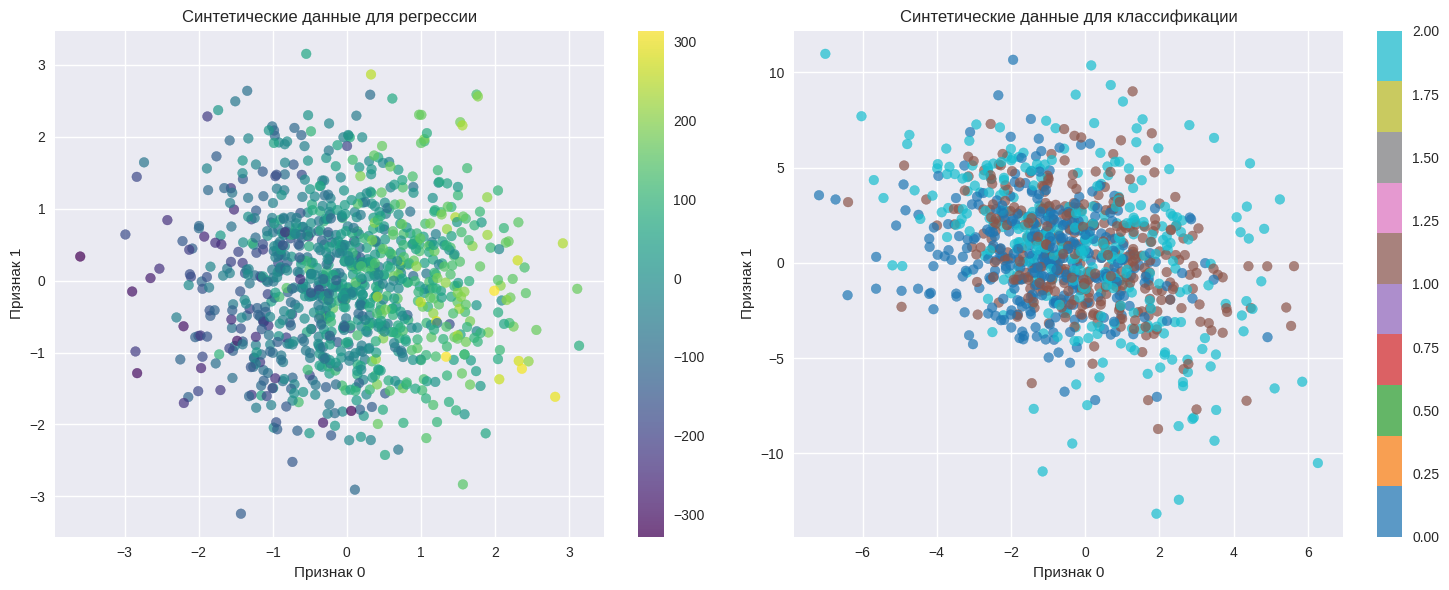

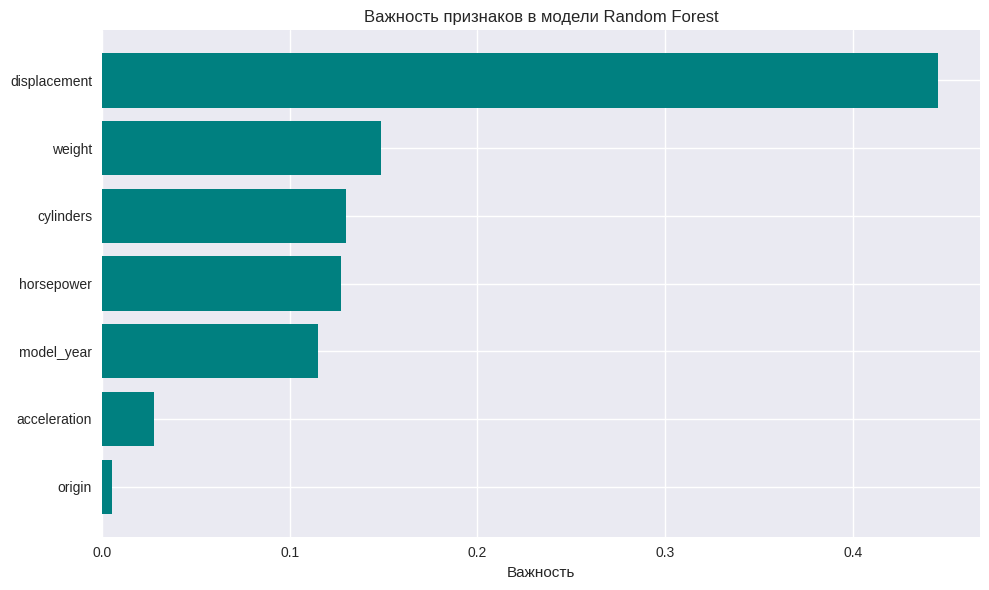

 Самые важные признаки:
        feature  importance
1  displacement    0.445451
3        weight    0.148847
0     cylinders    0.129814
2    horsepower    0.127436
5    model_year    0.115165


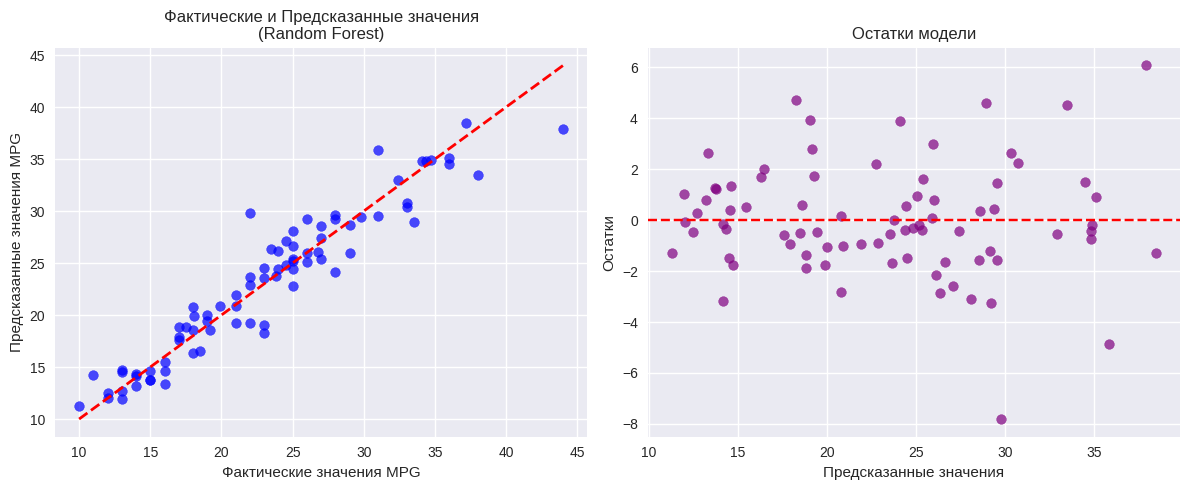

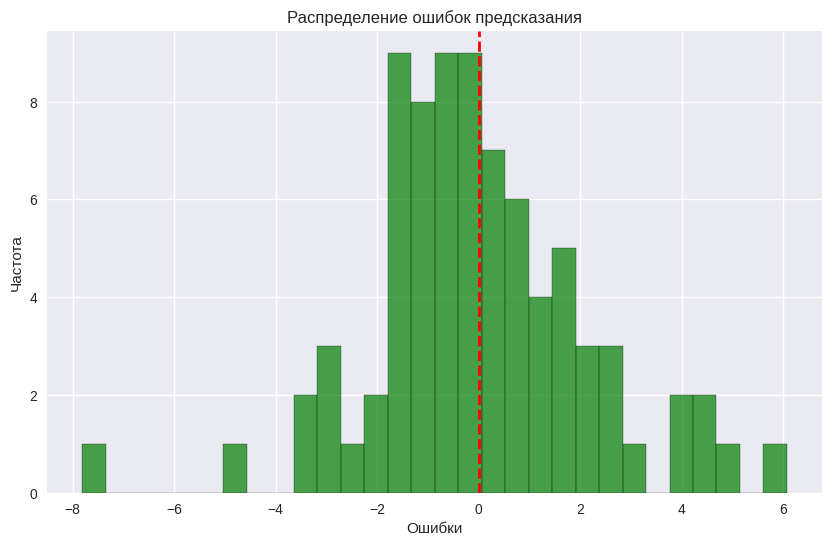


Лучшей в прогнозировании показала себя модель: Random Forest
Метрики модели: Random Forest
- MAE: 1.6140
- MSE: 4.7541
- RMSE: 2.1804
- R²: 0.9116

Результаты для модели на синтетических дынных :
- RMSE: 37.4855
- R²: 0.8872

Сравним все модели в таблице для наглядности результата (отсортировано по RMSE):
                    Model      MAE      MSE     RMSE       R2
            Random Forest 1.614000 4.754099 2.180390 0.911579
    K-Neighbors Regressor 1.838250 5.091115 2.256350 0.905311
        Gradient Boosting 1.764605 5.455679 2.335739 0.898530
Support Vector Regression 1.803531 6.886819 2.624275 0.871912
         Ridge Regression 2.429631 8.880157 2.979959 0.834838
        Linear Regression 2.430393 8.882879 2.980416 0.834788

Лучшая модель 'Random Forest' показывает наименьшую ошибку (RMSE = 2.1804)
и наилучшее объяснение дисперсии (R² = 0.9116) на тестовых данных.
Модель может быть использована для прогнозирования топливной эффективности автомобиля.



In [29]:
# Загрузка необходимых библиотек для регрессий

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Регрессоры которые будем использовать
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Для синтетических данных
from sklearn.datasets import make_regression, make_classification

import warnings
warnings.filterwarnings('ignore')

# Настройка отображения графиков
plt.style.use('seaborn-v0_8')

print("АНАЛИЗ РЕГРЕССИИ - ДАТАСЕТ AUTOMPG\n")
# ------ Загрузка датасета autompg
import seaborn as sns
df = sns.load_dataset('mpg')
print(" Данные загружены из seaborn")

# Посмотрим на данные
print(" Размер датасета:", df.shape)
print("\n Первые 5 строк:")
print(df.head())

print("\n Информация о данных:")
print(df.info())

print("\n Статистическое описание:")
print(df.describe())

# ---- Обработка данных
# Создаем копию датасета для работы
data = df.copy()

# Проверка на пропущенные значения
print("\nПропущенные значения:")
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

# Обработка пропусков
if data.isnull().sum().any():
    print(" Заполняем пропущенные значения.")
    # Заполним пропуски медианными значениями для числовых признаков
    numeric_columns = data.select_dtypes(include=[np.number]).columns
    imputer = SimpleImputer(strategy='median')
    data[numeric_columns] = imputer.fit_transform(data[numeric_columns])

# Обработка категориальных признаков
print(" Обрабатываем категориальные признаки.")
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    if data[col].nunique() < 10:  # Если мало уникальных значений
        print(f" Кодируем признак: {col}")
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col].astype(str))
    else:
        print(f" Удаляем признак: {col} (слишком много уникальных значений)")
        data = data.drop(columns=[col])

# Проверка аномалий в целевом признаке (mpg)
print("\n Визуализируем распределение целевой переменной.")
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.boxplot(y=data['mpg'])
plt.title('Распределение MPG (целевая переменная)')

plt.subplot(1, 2, 2)
sns.histplot(data['mpg'], kde=True)
plt.title('Гистограмма распределения MPG')

plt.tight_layout()
plt.show()

# Анализ корреляций
plt.figure(figsize=(10, 8))
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Матрица корреляций признаков')
plt.show()

print("Наиболее важные признаки для предсказания mpg:")
mpg_correlations = correlation_matrix['mpg'].sort_values(ascending=False)
print(mpg_correlations)

#-----Подготавливаем данные для обучения

print("\nПодготавливаем данные для обучения.")

# Разделяем данные на признаки (X) и целевую переменную (y)
X = data.drop('mpg', axis=1)
y = data['mpg']

# Проверяем, что все данные числовые
print("Типы данных в X:")
print(X.dtypes)

# Убедимся, что все признаки числовые
X = X.select_dtypes(include=[np.number])

print(f"\nИтоговый размер данных X: {X.shape}")

# Разделяем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Данные для обучения подготовлены.")

#----- Реализация 6 регрессоров

print("\n Обучаем модели регрессии.")

# Создаем словарь с моделями
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression': SVR(kernel='rbf', C=1.0),
    'K-Neighbors Regressor': KNeighborsRegressor(n_neighbors=5),
    'Ridge Regression': Ridge(alpha=1.0)
}

# Словарь для хранения результатов
results = {}

# Обучаем каждую модель и сохраняем результаты
for name, model in models.items():
    print(f" Обучение модели: {name}")

    try:
        # Используем масштабированные данные для SVR и KNN, обычные для остальных
        if name in ['Support Vector Regression', 'K-Neighbors Regressor']:
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

        # Вычисляем метрики
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # Сохраняем результаты
        results[name] = {
            'model': model,
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse,
            'R2': r2,
            'predictions': y_pred
        }

        print(f"    {name} - R²: {r2:.4f}, RMSE: {rmse:.4f}")

    except Exception as e:
        print(f"    Ошибка при обучении {name}: {e}")

print(" Все модели обучены.")


#----- Сравним модели и выберем лучшую

# Создаем DataFrame с результатами
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'MAE': [results[name]['MAE'] for name in results],
    'MSE': [results[name]['MSE'] for name in results],
    'RMSE': [results[name]['RMSE'] for name in results],
    'R2': [results[name]['R2'] for name in results]
})

print("\n Сравнение моделей (отсортировано по RMSE):")
print(results_df.sort_values('RMSE'))

# Визуализация сравнения моделей
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# График RMSE
results_df_sorted = results_df.sort_values('RMSE')
axes[0, 0].barh(results_df_sorted['Model'], results_df_sorted['RMSE'], color='skyblue')
axes[0, 0].set_title('Сравнение RMSE моделей (чем меньше - тем лучше)')
axes[0, 0].set_xlabel('RMSE')

# График R²
results_df_sorted_r2 = results_df.sort_values('R2', ascending=False)
axes[0, 1].barh(results_df_sorted_r2['Model'], results_df_sorted_r2['R2'], color='lightgreen')
axes[0, 1].set_title('Сравнение R² моделей (чем больше - тем лучше)')
axes[0, 1].set_xlabel('R²')

# График MAE
results_df_sorted_mae = results_df.sort_values('MAE')
axes[1, 0].barh(results_df_sorted_mae['Model'], results_df_sorted_mae['MAE'], color='lightcoral')
axes[1, 0].set_title('Сравнение MAE моделей (чем меньше - тем лучше)')
axes[1, 0].set_xlabel('MAE')

# График предсказаний лучшей модели
best_model_name = results_df.loc[results_df['RMSE'].idxmin(), 'Model']
best_predictions = results[best_model_name]['predictions']
axes[1, 1].scatter(y_test, best_predictions, alpha=0.7, color='purple')
axes[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1, 1].set_xlabel('Фактические значения MPG')
axes[1, 1].set_ylabel('Предсказанные значения MPG')
axes[1, 1].set_title(f'Предсказания лучшей модели: {best_model_name}')

plt.tight_layout()
plt.show()

# Выбор лучшей модели
best_model_name = results_df.loc[results_df['RMSE'].idxmin(), 'Model']
best_model = results[best_model_name]['model']
best_metrics = results[best_model_name]

print(f"\n *Лучшая модель*: {best_model_name}")
print(" Метрики лучшей модели:")
print(f"   MAE: {best_metrics['MAE']:.4f}")
print(f"   MSE: {best_metrics['MSE']:.4f}")
print(f"   RMSE: {best_metrics['RMSE']:.4f}")
print(f"   R²: {best_metrics['R2']:.4f}")



#----- Синтетические данные


# Синтетические данные для регрессии
print("\n Создание синтетических данных для регрессии.")
X_synth_reg, y_synth_reg = make_regression(
    n_samples=1000,
    n_features=10,
    n_informative=8,
    noise=0.1,
    random_state=42
)

# Создаем DataFrame для наглядности
synth_reg_df = pd.DataFrame(X_synth_reg, columns=[f'feature_{i}' for i in range(10)])
synth_reg_df['target'] = y_synth_reg

print(f" Размер синтетического датасета для регрессии: {synth_reg_df.shape}")

# Обучаем лучшую модель на синтетических данных
X_synth_train, X_synth_test, y_synth_train, y_synth_test = train_test_split(
    X_synth_reg, y_synth_reg, test_size=0.2, random_state=42
)

# Создаем копию лучшей модели для работы с синтетическими данными
from copy import deepcopy
best_model_synth = deepcopy(best_model)

# Обучаем на синтетических данных
if best_model_name in ['Support Vector Regression', 'K-Neighbors Regressor']:
    scaler_synth = StandardScaler()
    X_synth_train_scaled = scaler_synth.fit_transform(X_synth_train)
    X_synth_test_scaled = scaler_synth.transform(X_synth_test)
    best_model_synth.fit(X_synth_train_scaled, y_synth_train)
    y_synth_pred = best_model_synth.predict(X_synth_test_scaled)
else:
    best_model_synth.fit(X_synth_train, y_synth_train)
    y_synth_pred = best_model_synth.predict(X_synth_test)

# Оцениваем качество на синтетических данных
synth_rmse = np.sqrt(mean_squared_error(y_synth_test, y_synth_pred))
synth_r2 = r2_score(y_synth_test, y_synth_pred)

print(f" Результаты на синтетических данных:")
print(f" RMSE: {synth_rmse:.4f}")
print(f" R²: {synth_r2:.4f}")

# Синтетические данные для классификации
#print("\n" + "-"*50)
print("\n Создание синтетических данных для классификации.")

X_synth_clf, y_synth_clf = make_classification( #необходимо проанализировать
    n_samples=1000,
    n_features=10,
    n_informative=8,
    n_redundant=2,
    n_classes=3,
    random_state=42
)

# Создаем DataFrame для наглядности
synth_clf_df = pd.DataFrame(X_synth_clf, columns=[f'feature_{i}' for i in range(10)])
synth_clf_df['target'] = y_synth_clf

print(f" Размер синтетического датасета для классификации: {synth_clf_df.shape}")
print(" Распределение классов:")
print(synth_clf_df['target'].value_counts())

# Покажем синтетические данные
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Данные для регрессии
scatter1 = axes[0].scatter(X_synth_reg[:, 0], X_synth_reg[:, 1], c=y_synth_reg, cmap='viridis', alpha=0.7)
axes[0].set_title('Синтетические данные для регрессии')
axes[0].set_xlabel('Признак 0')
axes[0].set_ylabel('Признак 1')
plt.colorbar(scatter1, ax=axes[0])

# Визуализация данных для классификации
scatter2 = axes[1].scatter(X_synth_clf[:, 0], X_synth_clf[:, 1], c=y_synth_clf, cmap='tab10', alpha=0.7)
axes[1].set_title('Синтетические данные для классификации')
axes[1].set_xlabel('Признак 0')
axes[1].set_ylabel('Признак 1')
plt.colorbar(scatter2, ax=axes[1])

plt.tight_layout()
plt.show()


# Анализ важности признаков для tree-based моделей
if hasattr(best_model, 'feature_importances_'):
    try:
        # Проверяем, что количество признаков совпадает
        if len(X.columns) == len(best_model.feature_importances_):
            plt.figure(figsize=(10, 6))
            feature_importance = pd.DataFrame({
                'feature': X.columns,
                'importance': best_model.feature_importances_
            }).sort_values('importance', ascending=True)

            plt.barh(feature_importance['feature'], feature_importance['importance'], color='teal')
            plt.title(f'Важность признаков в модели {best_model_name}')
            plt.xlabel('Важность')
            plt.tight_layout()
            plt.show()

            print(" Самые важные признаки:")
            print(feature_importance.sort_values('importance', ascending=False).head())
        else:
            print(" Количество признаков не совпадает с количеством важностей")
    except Exception as e:
        print(f" Ошибка при построении важности признаков: {e}")
else:
    print(" У этой модели нет атрибута feature_importances_")

# Сравнение фактических и предсказанных значений для лучшей модели
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, best_predictions, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Фактические значения MPG')
plt.ylabel('Предсказанные значения MPG')
plt.title(f'Фактические и Предсказанные значения\n({best_model_name})')

plt.subplot(1, 2, 2)
residuals = y_test - best_predictions
plt.scatter(best_predictions, residuals, alpha=0.7, color='purple')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Остатки модели')

plt.tight_layout()
plt.show()

# Анализ распределения ошибок
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, alpha=0.7, color='green', edgecolor='black')
plt.axvline(x=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Ошибки')
plt.ylabel('Частота')
plt.title('Распределение ошибок предсказания')
plt.show()

#-----Итоговый результат

results_summary = f"""
Лучшей в прогнозировании показала себя модель: {best_model_name}
Метрики модели: {best_model_name}
- MAE: {best_metrics['MAE']:.4f}
- MSE: {best_metrics['MSE']:.4f}
- RMSE: {best_metrics['RMSE']:.4f}
- R²: {best_metrics['R2']:.4f}

Результаты для модели на синтетических дынных :
- RMSE: {synth_rmse:.4f}
- R²: {synth_r2:.4f}

Сравним все модели в таблице для наглядности результата (отсортировано по RMSE):
{results_df.sort_values('RMSE').to_string(index=False)}

Лучшая модель '{best_model_name}' показывает наименьшую ошибку (RMSE = {best_metrics['RMSE']:.4f})
и наилучшее объяснение дисперсии (R² = {best_metrics['R2']:.4f}) на тестовых данных.
Модель может быть использована для прогнозирования топливной эффективности автомобиля.
"""
print(results_summary)



